In [55]:
#import the required libraries
import pandas as pd
import numpy
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as logr
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#***** assign values after train test split from average of coresponding heart disease true or false ********8

#reading in data from excel
data = pd.read_csv(r'../Dataset/heart_edited_for_report.csv')

#Convert question marks to values
data['ca'] = data['ca'].replace('?', 1)
data['thal'] = data['thal'].replace('?', 2)

#Drop columns with correlation of -0.2 to 0.2 with target
data = data.drop(columns=['fbs', 'chol', 'age', 'trestbps', 'restecg'])


In [113]:
#assign x and y
y = data.target.values
x = data.drop(['target'], axis = 1)

#train test split, random 20% test and 80% train becasue its not a time series
X_train, _ , Y_train, _ = train_test_split(x,y, test_size = 0.2)
Y_train = Y_train.reshape(-1, 1)

#normailize train data 
norm = MinMaxScaler(feature_range=(0, 1))
X_train = norm.fit_transform(X_train)
Y_train = norm.fit_transform(Y_train)

#normalize data for test split 
test = norm.fit_transform(data)
Y_test = np.delete(test,[0,1,2,3,4,5,6,7], 1)
X_test = np.delete(test, 8, 1)

#get test split
_, X_test, _, Y_test = train_test_split(X_test, Y_test, test_size = 0.2)

In [114]:
model = logr(solver = 'saga') #solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
model.fit(X_train, Y_train.ravel())
Y_pred = model.predict(X_test)

In [115]:
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[30  3]
 [ 3 25]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        33
         1.0       0.89      0.89      0.89        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



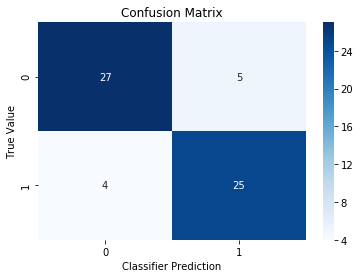

In [60]:
#plot CM    
ax= plt.subplot()
cm=confusion_matrix(Y_test,Y_pred)
sn.heatmap(cm, annot=True, cmap="Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Classifier Prediction')
ax.set_ylabel('True Value')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) 
ax.yaxis.set_ticklabels(['0', '1'])
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!